In [123]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from tabulate import tabulate


In [124]:
df = pd.read_csv("imdb_movies.csv")

In [125]:
df.head()

names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   

                    orig_title     status            orig_lang     budget_x  \
0                    Creed III   Released              English   75000000.0   
1     Avatar: The Way of Water   Released              English  460000000.0   
2  The Super Mario Bros. Movie   Released              English  100000000.0   
3                       Momias   Released   Spanish, Castilian   12300000.0   
4                    Supercell   Released              English   77000000.0   

        revenue country  
0  2.716167e+08      AU  
1  2.316795e+09      AU  
2  7.244590e+08      AU  
3  3.420000e+07      AU  
4  3.409420e+08      US

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [127]:
# Assuming you have a DataFrame named df
description_table = df.info()

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB



In [128]:
len(df)

10178

# Check Duplication

In [129]:
# Check if any duplicated value in all rows
df.duplicated().sum()

0

# Data Preprocessing

## Change data to datetime

In [130]:
df['date_x']

0        03/02/2023 
1        12/15/2022 
2        04/05/2023 
3        01/05/2023 
4        03/17/2023 
            ...     
10173    12/28/2016 
10174    08/24/1990 
10175    12/21/1990 
10176    07/11/1995 
10177    07/20/2020 
Name: date_x, Length: 10178, dtype: object

In [131]:
df['release_date'] = pd.to_datetime(df['date_x'], infer_datetime_format=True)

## Check Missing Value

In [132]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

variable           dtype  count  unique  missing
0          names          object  10178    9660        0
1         date_x          object  10178    5688        0
2          score         float64  10178      79        0
3          genre          object  10178    2304       85
4       overview          object  10178    9905        0
5           crew          object  10178    9928       56
6     orig_title          object  10178    9736        0
7         status          object  10178       3        0
8      orig_lang          object  10178      54        0
9       budget_x         float64  10178    2316        0
10       revenue         float64  10178    8227        0
11       country          object  10178      60        0
12  release_date  datetime64[ns]  10178    5688        0

In [133]:
# Assuming you have a DataFrame named df
description_table = output

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

|    | variable     | dtype          |   count |   unique |   missing |
|---:|:-------------|:---------------|--------:|---------:|----------:|
|  0 | names        | object         |   10178 |     9660 |         0 |
|  1 | date_x       | object         |   10178 |     5688 |         0 |
|  2 | score        | float64        |   10178 |       79 |         0 |
|  3 | genre        | object         |   10178 |     2304 |        85 |
|  4 | overview     | object         |   10178 |     9905 |         0 |
|  5 | crew         | object         |   10178 |     9928 |        56 |
|  6 | orig_title   | object         |   10178 |     9736 |         0 |
|  7 | status       | object         |   10178 |        3 |         0 |
|  8 | orig_lang    | object         |   10178 |       54 |         0 |
|  9 | budget_x     | float64        |   10178 |     2316 |         0 |
| 10 | revenue      | float64        |   10178 |     8227 |         0 |
| 11 | country      | object         |   10178 |       60 |     

## Check Genre missing value

In [134]:
# remove genre has nan value 
filtered_genre = df.loc[df['genre'].isnull() == True]
filtered_genre

names       date_x  score genre  \
305         Housewife Sex Slaves: Hatano Yui  01/09/2015     0.0   NaN   
1174                 Beauty Rope Cosmetology  12/02/1983    10.0   NaN   
1561                                 Reclaim  07/29/2022    20.0   NaN   
1762              Ancient Chinese Whorehouse  09/15/1994    50.0   NaN   
1776       Porno document: Toruko tokkyû bin  02/26/1982   100.0   NaN   
...                                      ...          ...    ...   ...   
9626                                Euphoria  11/29/2022     0.0   NaN   
9733                                 Fanatic  04/06/2023     0.0   NaN   
10011                        Perfumed Garden  06/03/2000    53.0   NaN   
10025  The Girl and the Wooden Horse Torture  12/03/1982    50.0   NaN   
10076      The Shoga (Glass and Gas) Company  09/07/1990    37.0   NaN   

                                                overview  \
305    We don't have an overview translated in Englis...   
1174   Miki is the daughter of an affluent family. Sh...   
1561   She is a good woman living a fulfilling life. ...   
1762   Madam Five and carpenter Kong work together ma...   
1776                                    Pinku from 1982.   
...                                                  ...   
9626   Artist and filmmaker Julian Rosefeldt creates ...   
9733   Charlie and Gerald reunite their failed 2000's...   
10011  Imagine a world of pleasure, where passion is ...   
10025  Nami is a masochistic high school student who ...   
10076  "I have not been very active as a social filmm...   

                                                    crew  \
305                                         Yui Hatano,    
1174   Miki Takakura, Miki, Maya Ito, Rena, Ren Osugi...   
1561                                                 NaN   
1762   Kent Cheng, Kong, Yvonne Yung Hung, Miss Ng, S...   
1776   Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayok...   
...                                                  ...   
9626   Giancarlo Esposito, Taxi Driver, Virginia Newc...   
9733   Matt Cook, , Caroline Rhea, , Shannon Dang, , ...   
10011  Ivan Baccarat, Michael, Amy Lindsay, Lisa, Raj...   
10025  Serina Nishikawa, Nami Tsuchiya, Waka Oda, , A...   
10076                                                NaN   

                      orig_title     status   orig_lang     budget_x  \
305                  人妻性奴隷 波多野結衣   Released    Japanese  167540000.0   
1174                   団鬼六　美女縄化粧   Released    Japanese  201940000.0   
1561                     Reclaim   Released     Chinese   12001040.0   
1762                       青樓十二房   Released   Cantonese  163600000.0   
1776            ポルノドキュメント　トルコ特急便   Released    Japanese  201000000.0   
...                          ...        ...         ...          ...   
9626                    Euphoria   Released     English  167540000.0   
9733                     Fanatic   Released     English  167540000.0   
10011            Perfumed Garden   Released     English  159000000.0   
10025                 団鬼六　少女木馬責め   Released    Japanese  163600000.0   
10076   Sherkat-e Shisheh va Gaz   Released     Persian   58670000.0   

            revenue country release_date  
305    1.752700e+08      JP   2015-01-09  
1174   3.815731e+07      JP   1983-12-02  
1561   3.813901e+07      US   2022-07-29  
1762   8.126672e+08      HK   1994-09-15  
1776   1.569324e+09      JP   1982-02-26  
...             ...     ...          ...  
9626   1.752700e+08      US   2022-11-29  
9733   1.752700e+08      US   2023-04-06  
10011  2.792784e+08      ID   2000-06-03  
10025  8.126672e+08      JP   1982-12-03  
10076  3.859605e+08      IR   1990-09-07  

[85 rows x 13 columns]

In [135]:
df = df.dropna(subset=['genre'])

## Check Crew missing value

In [136]:
# remove genre has nan value 
filtered_crew = df.loc[df['crew'].isnull() == True]
filtered_crew

names       date_x  score  \
148                    Orgasm Inc: The Story of OneTaste  11/05/2022    64.0   
206    Legend of the Galactic Heroes: Die Neue These ...  09/30/2022    61.0   
649                    Cuento de Primavera-A Spring Tale  12/20/2022    81.0   
938               Cat Pack: A PAW Patrol Exclusive Event  06/24/2022    74.0   
1752                        Avatar: Scene Deconstruction  12/18/2009    71.0   
1828             Cyber Hell: Exposing an Internet Horror  05/18/2022    73.0   
1881                      Guinea Pig: Devil's Experiment  09/04/1985    47.0   
2622                        Naruto ga Hokage Ni Natta Hi  07/06/2016    68.0   
2795                                   Far from the Tree  11/24/2021    81.0   
2955                                Ki Main Jhoot Boleya  03/24/2023     0.0   
3032                                Get Smart With Money  09/06/2022    62.0   
3134                     Naruto to Boruto: The Live 2019  05/05/2019    75.0   
3274                                Erotic Ghost Story V  12/01/1997     0.0   
3649                                What We Leave Behind  09/30/2022    63.0   
3671                The Walking Dead: The Journey So Far  10/16/2016    81.0   
3785                                  The Ghost Story IX  01/01/1992     0.0   
4152                                My Daughter's Killer  07/12/2022    64.0   
4395                                                Away  02/23/2020    64.0   
4784                                      Halo: Landfall  10/26/2007    61.0   
4812                                            Grenfell  04/07/2023     0.0   
4893                     Top Gun Maverick : Le phénomène  12/23/2022    75.0   
4898                         Tri Âm: Người Giữ Thời Gian  04/08/2023     0.0   
4916                   Super Monsters: Once Upon a Rhyme  06/01/2021    62.0   
4994                     Untold: The Race of the Century  09/06/2022    73.0   
5047               Phantom of the Kill: Zero's Rebellion  04/07/2016    68.0   
5119                                       Hilda Crack 7  04/07/2023     0.0   
5154    Maggie Simpson in The Force Awakens from Its Nap  05/04/2021    68.0   
5719                                I Am Vanessa Guillen  11/17/2022    74.0   
6552                                               Found  10/13/2021    74.0   
6899                     Skandal! Bringing Down Wirecard  09/16/2022    75.0   
7192          Trust No One: The Hunt for the Crypto King  03/30/2022    60.0   
7486                 The Photographer: Murder in Pinamar  04/21/2022    77.0   
7500                  Dragon Ball: Goku's Traffic Safety  06/01/1988    67.0   
7858                                               Piper  06/16/2016    82.0   
7937                        Big Mäck: Gangsters and Gold  01/20/2023    69.0   
8204                                      Hurray Mexico!  12/31/1932    58.0   
8258                               The Ritual: Black Nun  04/06/2023     0.0   
8465   The Legend of the Galactic Heroes: Die Neue Th...  09/27/2019    79.0   
8520                                     Tryo - Live XXV  12/07/2022    60.0   
9750                               Alice Under the Table  10/15/2015    61.0   
10079                                      Save The Tree  10/22/2021    44.0   

                                                genre  \
148                                       Documentary   
206                                         Animation   
649                           Drama, Fantasy, Mystery   
938                                 Animation, Family   
1752                                      Documentary   
1828                                      Documentary   
1881                                           Horror   
2622                        Animation, Drama, Fantasy   
2795                                Animation, Family   
2955                                  Romance, Comedy   
3032                                      Documentary   
3134  

In [137]:
df = df.dropna(subset=['crew'])

## After drop missing value

In [138]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

variable           dtype  count  unique  missing
0          names          object  10052    9538        0
1         date_x          object  10052    5642        0
2          score         float64  10052      78        0
3          genre          object  10052    2300        0
4       overview          object  10052    9810        0
5           crew          object  10052    9857        0
6     orig_title          object  10052    9614        0
7         status          object  10052       3        0
8      orig_lang          object  10052      53        0
9       budget_x         float64  10052    2311        0
10       revenue         float64  10052    8202        0
11       country          object  10052      57        0
12  release_date  datetime64[ns]  10052    5642        0

In [139]:
# Assuming you have a DataFrame named df
description_table = output

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

|    | variable     | dtype          |   count |   unique |   missing |
|---:|:-------------|:---------------|--------:|---------:|----------:|
|  0 | names        | object         |   10052 |     9538 |         0 |
|  1 | date_x       | object         |   10052 |     5642 |         0 |
|  2 | score        | float64        |   10052 |       78 |         0 |
|  3 | genre        | object         |   10052 |     2300 |         0 |
|  4 | overview     | object         |   10052 |     9810 |         0 |
|  5 | crew         | object         |   10052 |     9857 |         0 |
|  6 | orig_title   | object         |   10052 |     9614 |         0 |
|  7 | status       | object         |   10052 |        3 |         0 |
|  8 | orig_lang    | object         |   10052 |       53 |         0 |
|  9 | budget_x     | float64        |   10052 |     2311 |         0 |
| 10 | revenue      | float64        |   10052 |     8202 |         0 |
| 11 | country      | object         |   10052 |       57 |     

## Genre using tfidfvectorizer

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

In [141]:
# Melakukan perhitungan idf pada data cuisine
tf.fit(df['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out() 

array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'history',
       'horror', 'movie', 'music', 'mystery', 'romance', 'science',
       'thriller', 'tv', 'war', 'western'], dtype=object)

In [142]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(10052, 21)

In [143]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto
 
output = pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df.names
).sample(21, axis=1).sample(10, axis=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [144]:
# Assuming you have a DataFrame named df
description_table = output

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

| names                       |   animation |   fantasy |   fiction |   music |   action |   movie |   science |   tv |   horror |   western |   family |   history |    drama |   comedy |   documentary |   mystery |    crime |   war |   adventure |   thriller |   romance |
|:----------------------------|------------:|----------:|----------:|--------:|---------:|--------:|----------:|-----:|---------:|----------:|---------:|----------:|---------:|---------:|--------------:|----------:|---------:|------:|------------:|-----------:|----------:|
| Maze Runner: The Death Cure |    0        |         0 |  0.506802 |       0 | 0.378083 |       0 |  0.506802 |    0 |        0 |         0 | 0        |         0 | 0        | 0        |             0 |  0        | 0        |     0 |    0.439987 |   0.387    |  0        |
| Jexi                        |    0        |         0 |  0        |       0 | 0        |       0 |  0        |    0 |        0 |         0 | 0        |         0 | 0        | 1

In [145]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.75879148, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41003238, 0.47716842, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.43086163, 0.47295754, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.34187823, 0.39785516, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.57139027, ..., 0.        , 0.        ,
         0.        ]])

## Genre into list

In [146]:
# Function to split and remove \xa0 from genre strings
def split_genre(genre_string):
    genre_list = [genre.strip().replace('\xa0', '') for genre in genre_string.split(',')]
    return genre_list

# Apply the function to the 'genre' column and create a new 'genre_split' column
df['genre_split'] = df['genre'].apply(split_genre)

In [147]:
set_of_genre = set()
for genres in df['genre_split']:
    for genre in genres:
        set_of_genre.add(genre)

In [148]:
set_of_genre

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [149]:
# Perform one-hot encoding for genres
one_hot_encoding = pd.get_dummies(df['genre_split'].apply(pd.Series).stack()).sum(level=0)

C:\Users\user\AppData\Local\Temp\ipykernel_8412\1301492374.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_encoding = pd.get_dummies(df['genre_split'].apply(pd.Series).stack()).sum(level=0)


In [150]:
one_hot_encoding

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
0           1          0          0       0      0            0      1   
1           1          1          0       0      0            0      0   
2           0          1          1       1      0            0      0   
3           0          1          1       1      0            0      0   
4           1          0          0       0      0            0      0   
...       ...        ...        ...     ...    ...          ...    ...   
10173       0          0          0       0      0            0      1   
10174       1          0          0       0      0            0      0   
10175       0          0          0       0      0            0      1   
10176       1          1          0       0      0            0      0   
10177       0          0          1       0      0            0      0   

       Family  Fantasy  History  Horror  Music  Mystery  Romance  \
0           0        0        0       0      0        0        0   
1           0        0        0       0      0        0        0   
2           1        1        0       0      0        0        0   
3           1        1        0       0      0        0        0   
4           0        0        0       0      0        0        0   
...       ...      ...      ...     ...    ...      ...      ...   
10173       0        0        0       0      0        0        0   
10174       0        0        0       0      0        0        0   
10175       0        0        0       0      0        0        1   
10176       0        0        0       1      0        0        0   
10177       1        1        0       0      0        0        0   

       Science Fiction  TV Movie  Thriller  War  Western  
0                    0         0         0    0        0  
1                    1         0         0    0        0  
2                    0         0         0    0        0  
3                    0         0         0    0        0  
4                    0         0         0    0        0  
...                ...       ...       ...  ...      ...  
10173                0         0         0    0        0  
10174                0         0         0    0        0  
10175                0         0         1    0        0  
10176                1         0         1    0        0  
10177                0         0         0    0        0  

[10052 rows x 19 columns]

In [151]:
# Concatenate the one-hot encoded genres with the original DataFrame
df_one_hot = pd.concat([df['names'], one_hot_encoding], axis=1)

In [152]:
# Assuming you have a DataFrame named df
description_table = df_one_hot.head()

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

|    | names                       |   Action |   Adventure |   Animation |   Comedy |   Crime |   Documentary |   Drama |   Family |   Fantasy |   History |   Horror |   Music |   Mystery |   Romance |   Science Fiction |   TV Movie |   Thriller |   War |   Western |
|---:|:----------------------------|---------:|------------:|------------:|---------:|--------:|--------------:|--------:|---------:|----------:|----------:|---------:|--------:|----------:|----------:|------------------:|-----------:|-----------:|------:|----------:|
|  0 | Creed III                   |        1 |           0 |           0 |        0 |       0 |             0 |       1 |        0 |         0 |         0 |        0 |       0 |         0 |         0 |                 0 |          0 |          0 |     0 |         0 |
|  1 | Avatar: The Way of Water    |        1 |           1 |           0 |        0 |       0 |             0 |       0 |        0 |         0 |         0 |        0 |       0 |         0 |   

In [153]:
# df.drop(columns=['genre_split','genre'], inplace=True)

In [154]:
df

names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                                    crew  \
0      Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1      Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2      Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3      Óscar Barberán, Thut (voice), Ana Esther Albor...   
4      Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   
...                                                  ...   
10173  Annette Bening, Dorothea Fields, Lucas Jade Zu...   
10174  Chuck Norris, Col. Scott McCoy, Billy Drago, R...   
10175  Sean Connery, Bartholomew 'Barley' Scott Blair...   
10176  Larry Drake, Robert G. Durant, Arnold Vosloo, ...   
10177  Nina Herzog, Princess Odette (voice), Yuri Low...   

                                    orig_title     status  \
0                                    Creed III   Released   
1                     Avatar: The Way of Water   Released   
2                  The Super Mario Bros. Movie   Released   
3                                       Momias   Released   
4                                    Supercell   Released   
...                                        ...        ...   
10173                       20th Century Women   Released   
10174  Delta Force 2: The Colombian Connection   Released   
10175                         The Russia House   Released   
10176         Darkman II: The Return of Durant   Released   
10177       The Swan Princess: A Royal Wedding   Released   

                 orig_lang     budget_x       revenue country release_date  \
0                  English   75000000.0  2.716167e+08      AU   2023-03-02   
1                  English  460000000.0  2.316795e+09      AU   2022-12-15   
2                  English  100000000.0  7.244590e+08      AU   2023-0

## Check revenue & Budget

In [155]:
df['revenue']

0        2.716167e+08
1        2.316795e+09
2        7.244590e+08
3        3.420000e+07
4        3.409420e+08
             ...     
10173    9.353729e+06
10174    6.698361e+06
10175    2.299799e+07
10176    4.756613e+08
10177    5.394018e+08
Name: revenue, Length: 10052, dtype: float64

In [156]:
# Custom function to format the revenue as a dollar value
def format_value(value):
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the default system locale
    return locale.currency(value, grouping=True)

# Apply the custom function to format revenue in the DataFrame
df['revenue_formatted'] = df['revenue'].apply(format_value)
df['budget_formatted'] = df['budget_x'].apply(format_value)

df['revenue_formatted'] = df['revenue_formatted'].str.replace('[Rp,.]', '', regex=True).astype(float)
df['budget_formatted'] = df['budget_formatted'].str.replace('[Rp,.]', '', regex=True).astype(float)

In [157]:
df

names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                                    crew  \
0      Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1      Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2      Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3      Óscar Barberán, Thut (voice), Ana Esther Albor...   
4      Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   
...                                                  ...   
10173  Annette Bening, Dorothea Fields, Lucas Jade Zu...   
10174  Chuck Norris, Col. Scott McCoy, Billy Drago, R...   
10175  Sean Connery, Bartholomew 'Barley' Scott Blair...   
10176  Larry Drake, Robert G. Durant, Arnold Vosloo, ...   
10177  Nina Herzog, Princess Odette (voice), Yuri Low...   

                                    orig_title     status  \
0                                    Creed III   Released   
1                     Avatar: The Way of Water   Released   
2                  The Super Mario Bros. Movie   Released   
3                                       Momias   Released   
4                                    Supercell   Released   
...                                        ...        ...   
10173                       20th Century Women   Released   
10174  Delta Force 2: The Colombian Connection   Released   
10175                         The Russia House   Released   
10176         Darkman II: The Return of Durant   Released   
10177       The Swan Princess: A Royal Wedding   Released   

                 orig_lang     budget_x       revenue country release_date  \
0                  English   75000000.0  2.716167e+08      AU   2023-03-02   
1                  English  460000000.0  2.316795e+09      AU   2022-12-15   
2                  English  100000000.0  7.244590e+08      AU   2023-0

## origin languange

In [158]:
# Function to split and remove \xa0 from genre strings
def split_origin(origin_string):
    origin_list = [origin.strip().replace('\xa0', '') for origin in origin_string.split(',')]
    return origin_list

# Apply the function to the 'genre' column and create a new 'genre_split' column
df['origin_lang_split'] = df['orig_lang'].apply(split_genre)

In [159]:
set_of_origin_lang = set()
for origin_langs in df['origin_lang_split']:
    for origin_lang in origin_langs:
        set_of_origin_lang.add(origin_lang)
        
set_of_origin_lang

{'Arabic',
 'Basque',
 'Bengali',
 'Bokmål',
 'Cantonese',
 'Castilian',
 'Catalan',
 'Central Khmer',
 'Chinese',
 'Czech',
 'Danish',
 'Dutch',
 'Dzongkha',
 'English',
 'Finnish',
 'Flemish',
 'French',
 'Galician',
 'German',
 'Greek',
 'Gujarati',
 'Hindi',
 'Hungarian',
 'Icelandic',
 'Indonesian',
 'Irish',
 'Italian',
 'Japanese',
 'Kannada',
 'Korean',
 'Latin',
 'Latvian',
 'Macedonian',
 'Malay',
 'Malayalam',
 'No Language',
 'Norwegian',
 'Norwegian Bokmål',
 'Oriya',
 'Persian',
 'Polish',
 'Portuguese',
 'Romanian',
 'Russian',
 'Serbian',
 'Serbo-Croatian',
 'Slovak',
 'Spanish',
 'Swedish',
 'Tagalog',
 'Tamil',
 'Telugu',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Valencian',
 'Vietnamese'}

In [160]:
df

names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                                    crew  \
0      Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1      Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2      Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3      Óscar Barberán, Thut (voice), Ana Esther Albor...   
4      Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   
...                                                  ...   
10173  Annette Bening, Dorothea Fields, Lucas Jade Zu...   
10174  Chuck Norris, Col. Scott McCoy, Billy Drago, R...   
10175  Sean Connery, Bartholomew 'Barley' Scott Blair...   
10176  Larry Drake, Robert G. Durant, Arnold Vosloo, ...   
10177  Nina Herzog, Princess Odette (voice), Yuri Low...   

                                    orig_title     status  \
0                                    Creed III   Released   
1                     Avatar: The Way of Water   Released   
2                  The Super Mario Bros. Movie   Released   
3                                       Momias   Released   
4                                    Supercell   Released   
...                                        ...        ...   
10173                       20th Century Women   Released   
10174  Delta Force 2: The Colombian Connection   Released   
10175                         The Russia House   Released   
10176         Darkman II: The Return of Durant   Released   
10177       The Swan Princess: A Royal Wedding   Released   

                 orig_lang     budget_x       revenue country release_date  \
0                  English   75000000.0  2.716167e+08      AU   2023-03-02   
1                  English  460000000.0  2.316795e+09      AU   2022-12-15   
2                  English  100000000.0  7.244590e+08      AU   2023-0

In [161]:
df_model = df[['names','score','genre_split','origin_lang_split','crew','overview','status','revenue','country','release_date']].copy()

df_model = df[['names','overview','genre','score']]


## overview

In [162]:
df['overview'].iloc[0]

'After dominating the boxing world, Adonis Creed has been thriving in both his career and family life. When a childhood friend and former boxing prodigy, Damien Anderson, resurfaces after serving a long sentence in prison, he is eager to prove that he deserves his shot in the ring. The face-off between former friends is more than just a fight. To settle the score, Adonis must put his future on the line to battle Damien — a fighter who has nothing to lose.'

## Realease date

In [163]:
date_range = df['release_date'].max() - df['release_date'].min()

# Convert the difference to years
years_range = date_range.days / 365.25  # 365.25 accounts for leap years

print("The range between the earliest and latest release dates is approximately {:.2f} years.".format(years_range))

The range between the earliest and latest release dates is approximately 120.63 years.


## Score Rating

In [164]:
df.loc[df['score'] == 0]

names       date_x  score  \
117                                               Fast X  05/19/2023     0.0   
216                                   The Little Mermaid  05/26/2023     0.0   
229                     Transformers: Rise of the Beasts  06/09/2023     0.0   
231                  Spider-Man: Across the Spider-Verse  06/02/2023     0.0   
373                                               Barbie  07/21/2023     0.0   
...                                                  ...          ...    ...   
9747                     Step Up Love Story: Double Love  05/10/2019     0.0   
9769                                              Dinner  04/06/2023     0.0   
9776                                   Delicious Sisters  12/19/2018     0.0   
9877   Detective Conan: Haibara Ai Monogatari ~Kuroga...  01/06/2023     0.0   
10087                                       DADDY OWL!!!  04/06/2023     0.0   

                                               genre  \
117                          Action, Crime, Thriller   
216              Adventure, Family, Fantasy, Romance   
229               Action, Adventure, Science Fiction   
231    Animation, Action, Adventure, Science Fiction   
373                                           Comedy   
...                                              ...   
9747                                          Comedy   
9769                                Thriller, Horror   
9776                                         Romance   
9877                                       Animation   
10087                                Drama, Thriller   

                                                overview  \
117    Over many missions and against impossible odds...   
216    The youngest of King Triton’s daughters, and t...   
229    A ‘90s globetrotting adventure that introduces...   
231    After reuniting with Gwen Stacy, Miles Morales...   
373    To live in Barbie Land is to be a perfect bein...   
...                                                  ...   
9747   After three years of marriage and a bit more k...   
9769   Johnny is extremely nervous to meet his girlfr...   
9776   Hyun-ji and Jin-hee are university friends. On...   
9877   We don't have an overview translated in Englis...   
10087  A young boy and his family are invaded and rob...   

                                                    crew  \
117    Vin Diesel, Dominic Toretto, Michelle Rodrigue...   
216    Halle Bailey, Ariel, Jonah Hauer-King, Prince ...   
229    Anthony Ramos, Noah, Dominique Fishback, Elena...   
231    Shameik Moore, Miles Morales / Spider-Man (voi...   
373    Margot Robbie, Barbie, Ryan Gosling, Ken, Amer...   
...                                                  ...   
9747   Hikaru Aoyama, Yura Onoda, Tama Mizuki, Naomi ...   
9769   Keegan McLean deWitt, Johnny, Fabiola De Viver...   
9776   Yoo Sul-young, , Kang Jae-hee, , Tae Bong, , S...   
9877   Minami Takayama, Conan Edogawa (voice), Megumi...   
10087  Marshall M, Judd, Trey M, Homeless Child, Jeff...   

                                orig_title            status  orig_lang  \
117                                 Fast X   Post Production    English   
216                     The Little Mermaid   Post Production    English   
229       Transformers: Rise of the Beasts   Post Production    English   
231    Spider-Man: Across the Spider-Verse   Post Production    English   
373                                 Barbie   Post Production    English   
...                                    ...               ...        ...   
9747                     映画版 ふたりエッチ ダブル・ラブ          Released   Japanese   
9769                                Dinner          Released    English   
9776                                맛있는누나들          Released     Korean   
9877            名探偵コナン 灰原哀物語～黒鉄のミステリートレイン～          Released   Japanese   
10087                           Beneath Us          Released    English   

          budget_x      revenue country release_date  \
117    340000000.0

# EDA

## Bagaimana distribusi rating film dalam dataset?

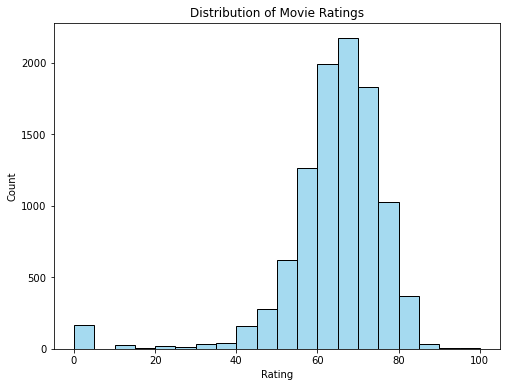

In [165]:
# Assuming 'df' is your DataFrame containing the 'rating' column
# If your rating column is named differently, replace 'rating' with the correct column name.

# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='score', bins=20, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

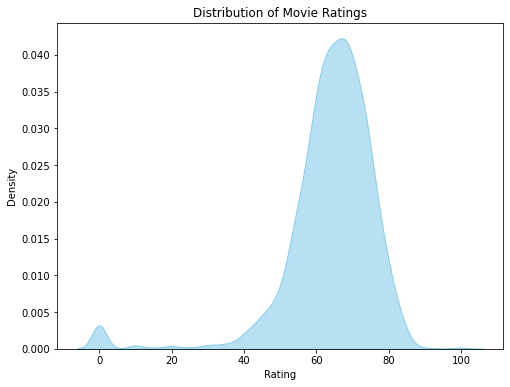

In [166]:
# Create a KDE plot to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='score', fill=True, color='skyblue', alpha=0.6)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

## Bagaimana distribusi pendapatan (revenue) dan budget film dalam dataset?


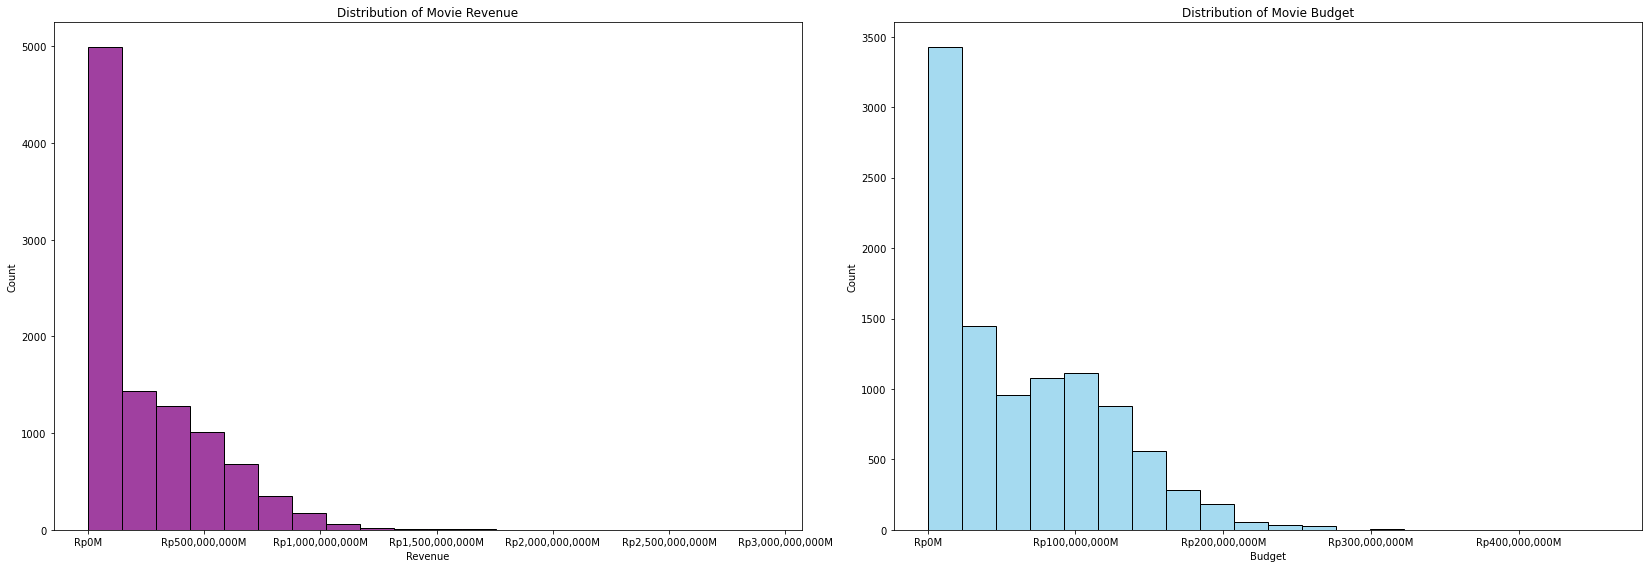

In [167]:
# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 8))

# Plot for Revenue
sns.histplot(data=df, x='revenue_formatted', bins=20, kde=False, color='purple', ax=ax1)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax1.set_title('Distribution of Movie Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Count')

# Plot for Budget
sns.histplot(data=df, x='budget_formatted', bins=20, kde=False, color='skyblue', ax=ax2)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax2.set_title('Distribution of Movie Budget')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

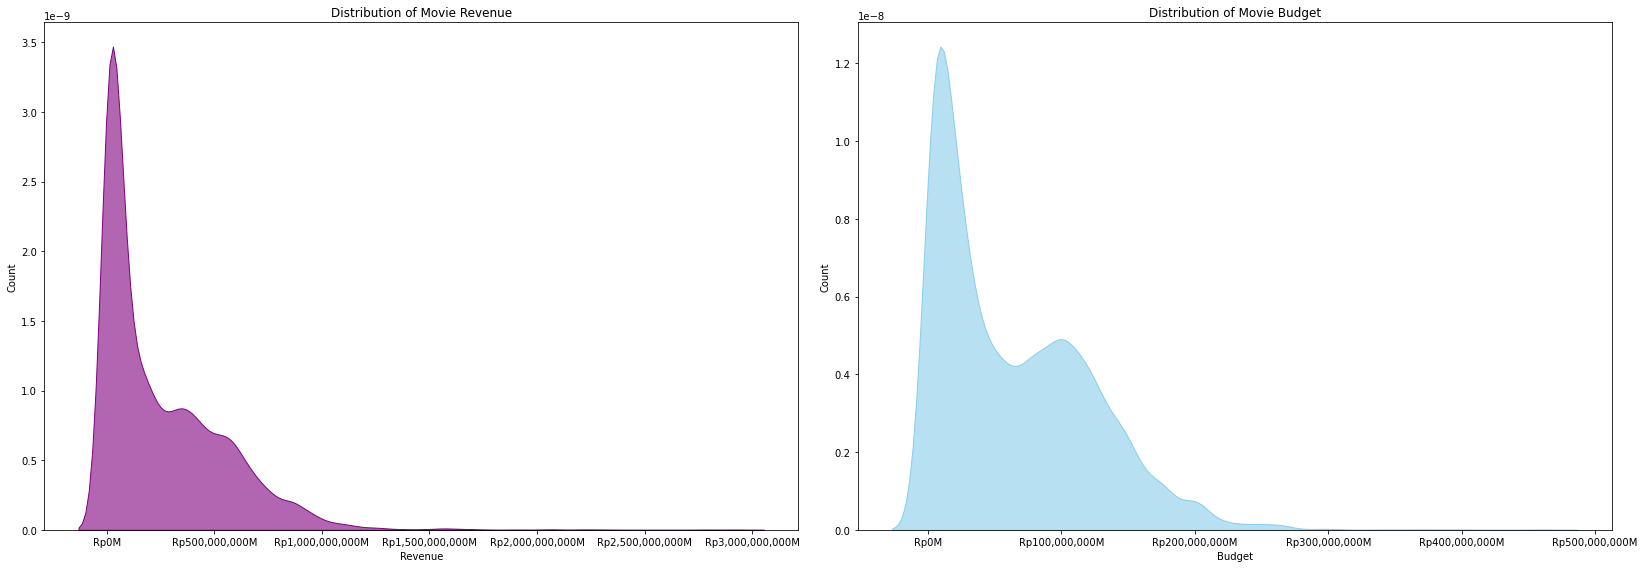

In [168]:
# Assuming you have already defined 'df' and imported necessary libraries

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 8))

# Plot for Revenue
sns.kdeplot(data=df, x='revenue_formatted',  fill=True, color='purple', alpha=0.6, ax=ax1)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax1.set_title('Distribution of Movie Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Count')

# Plot for Budget
sns.kdeplot(data=df, x='budget_formatted',  fill=True, color='skyblue', alpha=0.6,  ax=ax2)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax2.set_title('Distribution of Movie Budget')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Count')

plt.tight_layout()

# Save the subplots as JPG
plt.savefig('movie_revenue_budget_distribution.jpg', dpi=300)  # Saving the subplots as JPG with 300 DPI (adjust as needed)

plt.show()

## Apakah ada korelasi antara anggaran produksi dan pendapatan film?


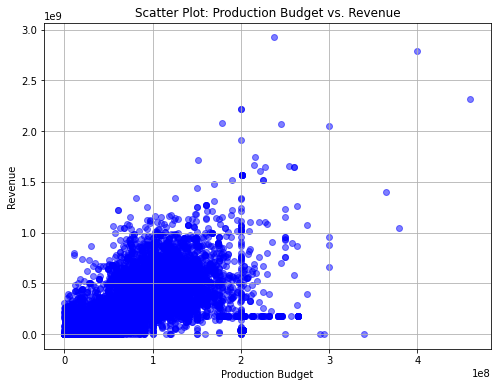

In [169]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'df' and imported necessary libraries

plt.figure(figsize=(8, 6))
plt.scatter(df['budget_formatted'], df['revenue_formatted'], alpha=0.5, color='b')
plt.title('Scatter Plot: Production Budget vs. Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Revenue')
plt.grid(True)

# Save the scatter plot as JPG
plt.savefig('production_budget_vs_revenue_scatter.jpg', dpi=300)  # Saving the scatter plot as JPG with 300 DPI (adjust as needed)

plt.show()


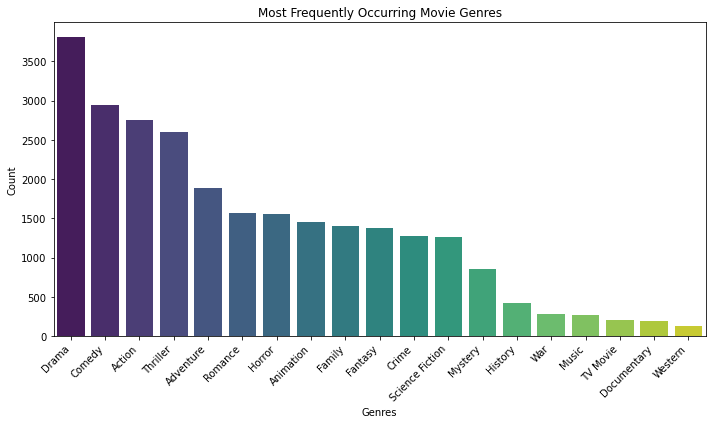

In [170]:
# Split multiple genres in the 'genres' column and create a new DataFrame
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()

# Create a bar plot to visualize the most frequent movie genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Most Frequently Occurring Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bagaimana distribusi tahun rilis film dalam dataset?

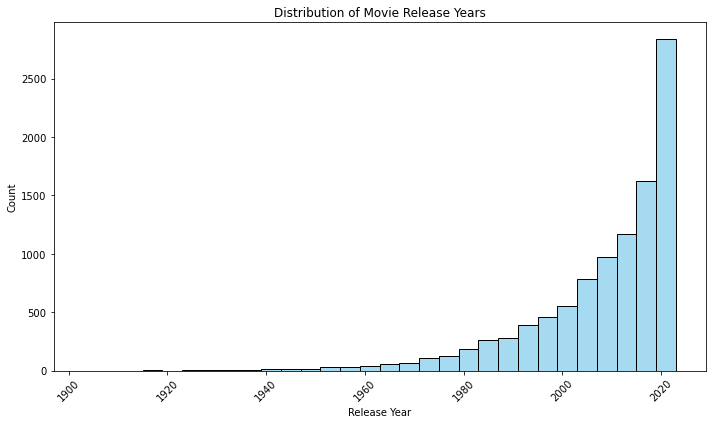

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already defined 'df' and imported necessary libraries

df['release_year'] = pd.to_datetime(df['release_date']).dt.year

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='skyblue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the histogram as JPG
plt.savefig('movie_release_years_distribution.jpg', dpi=300)  # Saving the histogram as JPG with 300 DPI (adjust as needed)

plt.show()


## Apakah ada tren peningkatan atau penurunan jumlah film dari waktu ke waktu?

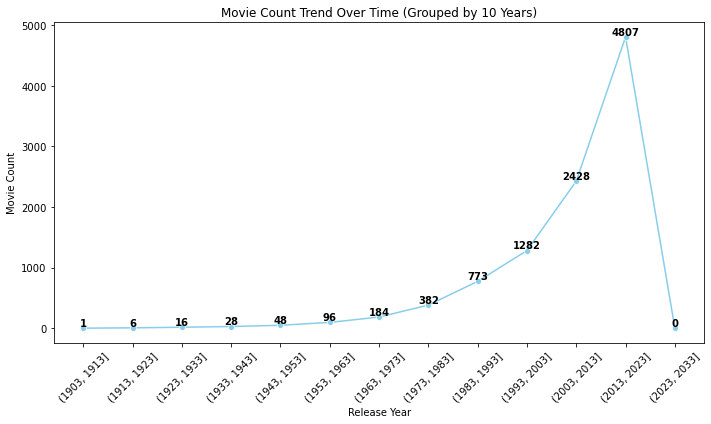

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already defined 'df' and imported necessary libraries

movie_count_by_year = df['release_year'].value_counts().sort_index()

# Create bins of 10 years
bins = range(df['release_year'].min(), df['release_year'].max() + 11, 10)

# Group movie counts into bins of 10 years and sum the counts in each bin
movie_count_by_bin = df.groupby(pd.cut(df['release_year'], bins=bins)).size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_count_by_bin.index.astype(str), y=movie_count_by_bin.values, marker='o', color='skyblue')
plt.title('Movie Count Trend Over Time (Grouped by 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data point labels (dot values) to the line plot
for i, count in enumerate(movie_count_by_bin.values):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black', fontweight='bold')

# Save the line plot as JPG
plt.savefig('movie_count_trend_over_time.jpg', dpi=300)  # Saving the line plot as JPG with 300 DPI (adjust as needed)

plt.show()


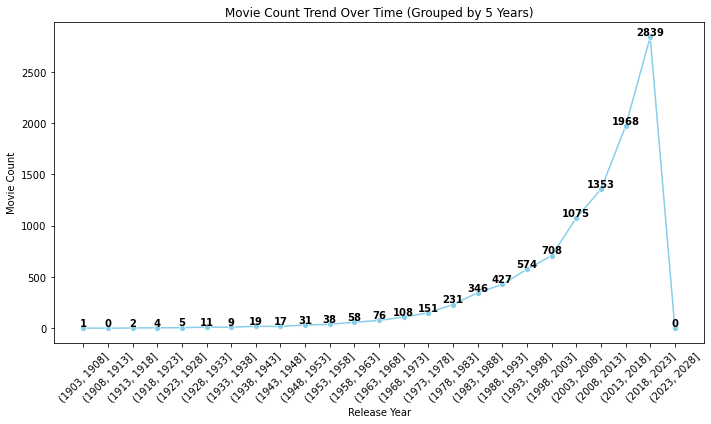

In [173]:
# Group the data by release year and count the number of movies for each year
movie_count_by_year = df['release_year'].value_counts().sort_index()

# Create bins of 5 years
bins = range(df['release_year'].min(), df['release_year'].max() + 6, 5)

# Group movie counts into bins of 5 years and sum the counts in each bin
movie_count_by_bin = df.groupby(pd.cut(df['release_year'], bins=bins)).size()

# Create a line plot to visualize the movie count trend over time with 5-year bins
plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_count_by_bin.index.astype(str), y=movie_count_by_bin.values, marker='o', color='skyblue')
plt.title('Movie Count Trend Over Time (Grouped by 5 Years)')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data point labels (dot values) to the line plot
for i, count in enumerate(movie_count_by_bin.values):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

In [174]:
df = df.reset_index()
df

index                                    names       date_x  score  \
0          0                                Creed III  03/02/2023    73.0   
1          1                 Avatar: The Way of Water  12/15/2022    78.0   
2          2              The Super Mario Bros. Movie  04/05/2023    76.0   
3          3                                  Mummies  01/05/2023    70.0   
4          4                                Supercell  03/17/2023    61.0   
...      ...                                      ...          ...    ...   
10047  10173                       20th Century Women  12/28/2016    73.0   
10048  10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10049  10175                         The Russia House  12/21/1990    61.0   
10050  10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10051  10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10047                                              Drama   
10048                                             Action   
10049                           Drama, Thriller, Romance   
10050  Action, Adventure, Science Fiction, Thriller, ...   
10051                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10047  In 1979 Santa Barbara, California, Dorothea Fi...   
10048  When DEA agents are taken captive by a ruthles...   
10049  Barley Scott Blair, a Lisbon-based editor of R...   
10050  Darkman and Durant return and they hate each o...   
10051  Princess Odette and Prince Derek are going to ...   

                                                    crew  \
0      Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1      Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2      Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3      Óscar Barberán, Thut (voice), Ana Esther Albor...   
4      Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   
...                                                  ...   
10047  Annette Bening, Dorothea Fields, Lucas Jade Zu...   
10048  Chuck Norris, Col. Scott McCoy, Billy Drago, R...   
10049  Sean Connery, Bartholomew 'Barley' Scott Blair...   
10050  Larry Drake, Robert G. Durant, Arnold Vosloo, ...   
10051  Nina Herzog, Princess Odette (voice), Yuri Low...   

                                    orig_title     status  \
0                                    Creed III   Released   
1                     Avatar: The Way of Water   Released   
2                  The Super Mario Bros. Movie   Released   
3                                       Momias   Released   
4                                    Supercell   Released   
...                                        ...        ...   
10047                       20th Century Women   Released   
10048  Delta Force 2: The Colombian Connection   Released   
10049                         The Russia House   Released   
10050         Darkman II: The Return of Durant   Released   
10051       The Swan Princess: A Royal Wedding   Released   

                 orig_lang     budget_x       revenue country release_date  \
0                  English   75000000.0  2.716167e+08      AU   2023-03-02   
1                  English  46

# Modeling

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [176]:
# X = np.array(df_model.overview)

# text_data = X
# model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# embeddings = model.encode(text_data, show_progress_bar=True)

In [177]:
# Assuming you already have the 'embeddings' array
# Save the embeddings to a file
# np.save('embeddings.npy', embeddings)

# Load the embeddings back from the file when needed
embeddings = np.load('embeddings.npy')

# embed_data = embeddings

In [178]:
rating_score = np.array(df_model.score)

# Concatenate additional features with embeddings
additional_features = np.column_stack((rating_score, one_hot_encoding))  # Adjust this based on your features
additional_features

array([[73.,  1.,  0., ...,  0.,  0.,  0.],
       [78.,  1.,  1., ...,  0.,  0.,  0.],
       [76.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [61.,  0.,  0., ...,  1.,  0.,  0.],
       [55.,  1.,  1., ...,  1.,  0.,  0.],
       [70.,  0.,  0., ...,  0.,  0.,  0.]])

## Using one hot encoding

In [179]:
combined_features = np.concatenate((embeddings, additional_features), axis=1)

n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(combined_features)
pca_data = pd.DataFrame(pca.transform(combined_features))
pca_data.head()

0         1         2         3         4
0  -9.300633 -1.249492  2.702341 -0.115435 -3.830368
1 -14.224997  2.553466 -0.095303  3.107830 -0.368415
2 -12.236611 -1.773772  3.259370 -1.204030 -0.571740
3  -6.218966 -0.866821  0.722755 -0.075495  0.377164
4   2.729626 -0.490431  2.463005  0.388725 -3.431429

In [180]:
cos_sim_data_1 = pd.DataFrame(cosine_similarity(pca_data))
cos_sim_data_1

0         1         2         3         4         5         6      \
0      1.000000  0.837401  0.942861  0.894807 -0.094420  0.488310  0.834959   
1      0.837401  1.000000  0.871562  0.916382 -0.504971  0.096676  0.896085   
2      0.942861  0.871562  1.000000  0.981074 -0.353161  0.480333  0.911402   
3      0.894807  0.916382  0.981074  1.000000 -0.501501  0.426018  0.965942   
4     -0.094420 -0.504971 -0.353161 -0.501501  1.000000  0.035787 -0.569398   
...         ...       ...       ...       ...       ...       ...       ...   
10047  0.693598  0.834148  0.715040  0.701457 -0.357602 -0.136138  0.578070   
10048 -0.632782 -0.869742 -0.785906 -0.838110  0.741505 -0.044568 -0.779894   
10049 -0.688795 -0.506078 -0.664969 -0.578548  0.113111 -0.417813 -0.462274   
10050 -0.747720 -0.863755 -0.781959 -0.761367  0.318413  0.113823 -0.621544   
10051  0.433896  0.822368  0.589943  0.689683 -0.825603 -0.208580  0.676248   

          7         8         9      ...     10042     10043     10044  \
0      0.866683 -0.620025 -0.691088  ...  0.704167 -0.001508 -0.832388   
1      0.975156 -0.748756 -0.949911  ...  0.879525 -0.080559 -0.954755   
2      0.935746 -0.515893 -0.709304  ...  0.698539 -0.005019 -0.913416   
3      0.978486 -0.498858 -0.799360  ...  0.751288  0.077694 -0.962081   
4     -0.551858  0.105969  0.588615  ... -0.295652 -0.168937  0.622476   
...         ...       ...       ...  ...       ...       ...       ...   
10047  0.756798 -0.908285 -0.729872  ...  0.602325 -0.551789 -0.772384   
10048 -0.871977  0.640432  0.805258  ... -0.590811  0.229632  0.912480   
10049 -0.529879  0.588374  0.363065  ... -0.104225  0.286090  0.604718   
10050 -0.798900  0.864637  0.720633  ... -0.701605  0.552378  0.781731   
10051  0.780926 -0.638519 -0.842323  ...  0.608496 -0.219159 -0.821950   

          10045     10046     10047     10048     10049     10050     10051  
0      0.807439  0.708369  0.693598 -0.632782 -0.688795 -0.747720  0.433896  
1      0.773866  0.907383  0.834148 -0.869742 -0.506078 -0.863755  0.822368  
2      0.942530  0.835695  0.715040 -0.785906 -0.664969 -0.781959  0.589943  
3      0.955005  0.900292  0.701457 -0.838110 -0.578548 -0.761367  0.689683  
4     -0.551691 -0.747877 -0.357602  0.741505  0.113111  0.318413 -0.825603  
...         ...       ...       ...       ...       ...       ...       ...  
10047  0.576432  0.794271  1.000000 -0.869752 -0.728860 -0.976621  0.801132  
10048 -0.798951 -0.969495 -0.869752  1.000000  0.625257  0.853003 -0.944692  
10049 -0.620444 -0.612398 -0.728860  0.625257  1.000000  0.657502 -0.401105  
10050 -0.623466 -0.775918 -0.976621  0.853003  0.657502  1.000000 -0.765799  
10051  0.608905  0.906710  0.801132 -0.944692 -0.401105 -0.765799  1.000000  

[10052 rows x 10052 columns]

In [181]:
def give_recommendations_1(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
    index_recomm =cos_sim_data_1.loc[index].sort_values(ascending=False).index.tolist()[1:11]
#     movies_recomm =  df_model['names'].loc[index_recomm].values
#     score_recomm =  df_model['score'].loc[index_recomm].values
#     result = {'Movies':movies_recomm,'Index':index_recomm, 'Score': score_recomm}
#     if print_recommendation==True:
#         print('The watched movie is this one: %s \n'%(df_model['names'].loc[index]))
#         k=1
#         for movie in movies_recomm:
#             print('The number %i recommended movie is this one: %s \n'%(k,movie))
#             k=k+1
#     if print_recommendation_plots==True:
#         print('The plot of the watched movie is this one:\n %s \n'%(df_model['overview'].loc[index]))
#         k=1
#         for q in range(len(movies_recomm)):
#             plot_q = data['Overview'].loc[index_recomm[q]]
#             print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
#             k=k+1
#     if print_genres==True:
#         print('The genres of the watched movie is this one:\n %s \n'%(df_model['genre'].loc[index]))
#         k=1
#         for q in range(len(movies_recomm)):
#             plot_q = data['Genre'].loc[index_recomm[q]]
#             print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
#             k=k+1
    return df.loc[index_recomm]

## Using tfid Vectorizer

In [182]:
tfidf_matrix_t = pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names()
)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [183]:
additional_features = np.column_stack((rating_score, tfidf_matrix_t))  # Adjust this based on your features
additional_features

array([[73.        ,  0.75879148,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [78.        ,  0.41003238,  0.47716842, ...,  0.        ,
         0.        ,  0.        ],
       [76.        ,  0.        ,  0.43086163, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [61.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [55.        ,  0.34187823,  0.39785516, ...,  0.        ,
         0.        ,  0.        ],
       [70.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [184]:
combined_features = np.concatenate((embeddings, additional_features), axis=1)

n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(combined_features)
pca_data = pd.DataFrame(pca.transform(combined_features))
pca_data.head()

0         1         2         3         4
0  -9.299299 -1.249633  2.748441 -0.251532 -3.781042
1 -14.226412  2.633005 -0.083077  3.103876 -0.496651
2 -12.231189 -1.776787  3.136237 -1.177817 -0.610904
3  -6.213411 -0.863651  0.596922 -0.014128  0.292866
4   2.727659 -0.475022  2.478863  0.298820 -3.464203

In [185]:
cos_sim_data_2 = pd.DataFrame(cosine_similarity(pca_data))
cos_sim_data_2

0         1         2         3         4         5         6      \
0      1.000000  0.836546  0.946131  0.897938 -0.092487  0.487830  0.834724   
1      0.836546  1.000000  0.873047  0.919511 -0.499181  0.092717  0.895010   
2      0.946131  0.873047  1.000000  0.979828 -0.352210  0.482943  0.915207   
3      0.897938  0.919511  0.979828  1.000000 -0.500767  0.428047  0.971364   
4     -0.092487 -0.499181 -0.352210 -0.500767  1.000000  0.030868 -0.569216   
...         ...       ...       ...       ...       ...       ...       ...   
10047  0.694628  0.835304  0.715810  0.700755 -0.351708 -0.136082  0.579490   
10048 -0.636407 -0.871287 -0.786874 -0.837881  0.737900 -0.047576 -0.783778   
10049 -0.688820 -0.511216 -0.660675 -0.574521  0.111075 -0.406416 -0.461720   
10050 -0.751913 -0.867431 -0.785190 -0.762430  0.317876  0.107374 -0.628970   
10051  0.435577  0.824818  0.588839  0.690579 -0.820224 -0.208254  0.679635   

          7         8         9      ...     10042     10043     10044  \
0      0.867237 -0.621675 -0.683674  ...  0.703693 -0.006170 -0.832477   
1      0.974774 -0.754077 -0.947602  ...  0.879510 -0.084037 -0.953945   
2      0.936416 -0.521991 -0.712447  ...  0.704440  0.001802 -0.916328   
3      0.980582 -0.507858 -0.810194  ...  0.758841  0.091710 -0.966123   
4     -0.547764  0.098248  0.593557  ... -0.295707 -0.177025  0.619712   
...         ...       ...       ...  ...       ...       ...       ...   
10047  0.755182 -0.907656 -0.719804  ...  0.601620 -0.554719 -0.772885   
10048 -0.871598  0.642669  0.807288  ... -0.594861  0.224725  0.914903   
10049 -0.529943  0.598301  0.364158  ... -0.107892  0.290604  0.606949   
10050 -0.800564  0.863471  0.714447  ... -0.704639  0.547587  0.786738   
10051  0.780903 -0.643090 -0.849409  ...  0.611535 -0.209882 -0.823725   

          10045     10046     10047     10048     10049     10050     10051  
0      0.811554  0.710124  0.694628 -0.636407 -0.688820 -0.751913  0.435577  
1      0.774068  0.907677  0.835304 -0.871287 -0.511216 -0.867431  0.824818  
2      0.942890  0.838398  0.715810 -0.786874 -0.660675 -0.785190  0.588839  
3      0.952913  0.903699  0.700755 -0.837881 -0.574521 -0.762430  0.690579  
4     -0.551644 -0.744058 -0.351708  0.737900  0.111075  0.317876 -0.820224  
...         ...       ...       ...       ...       ...       ...       ...  
10047  0.580564  0.794124  1.000000 -0.870090 -0.734298 -0.976456  0.799491  
10048 -0.801416 -0.970399 -0.870090  1.000000  0.627888  0.855507 -0.942471  
10049 -0.618100 -0.614076 -0.734298  0.627888  1.000000  0.660393 -0.406657  
10050 -0.631255 -0.780181 -0.976456  0.855507  0.660393  1.000000 -0.764540  
10051  0.607657  0.906816  0.799491 -0.942471 -0.406657 -0.764540  1.000000  

[10052 rows x 10052 columns]

In [186]:
def give_recommendations_2(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
    index_recomm =cos_sim_data_2.loc[index].sort_values(ascending=False).index.tolist()[1:11]
#     print(index_recomm)
#     movies_recomm =  df_model['names'].loc[index_recomm].values
#     score_recomm =  df_model['score'].loc[index_recomm].values
#     result = {'Movies':movies_recomm,'Index':index_recomm, 'Score': score_recomm}
#     if print_recommendation==True:
#         print('The watched movie is this one: %s \n'%(df_model['names'].loc[index]))
#         k=1
#         for movie in movies_recomm:
#             print('The number %i recommended movie is this one: %s \n'%(k,movie))
#             k = k+1
#     if print_recommendation_plots==True:
#         print('The plot of the watched movie is this one:\n %s \n'%(df_model['overview'].loc[index]))
#         k=1
#         for q in range(len(movies_recomm)):
#             plot_q = data['Overview'].loc[index_recomm[q]]
#             print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
#             k=k+1
#     if print_genres==True:
#         print('The genres of the watched movie is this one:\n %s \n'%(df_model['genre'].loc[index]))
#         k=1
#         for q in range(len(movies_recomm)):
#             plot_q = data['Genre'].loc[index_recomm[q]]
#             print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
#             k=k+1
    return df.loc[index_recomm]

In [187]:
df_recommendations_1 = pd.DataFrame()
df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(228, True))
df_recommendations_1

C:\Users\user\AppData\Local\Temp\ipykernel_8412\1434531665.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(228, True))


index                                              names       date_x  \
4918   4978                                  Batman: Bad Blood  02/02/2016    
4146   4185  Crayon Shin-chan: Shrouded in Mystery! The Flo...  04/23/2021    
8572   8682                                Battleship Potemkin  12/24/1925    
6299   6381                              Nosferatu the Vampyre  04/12/1979    
2241   2255                 Justice League Dark: Apokolips War  06/01/2020    
76       76                            Spider-Man: No Way Home  12/16/2021    
8377   8484                                            Solaris  03/20/1972    
4310   4353          Rurouni Kenshin Part III: The Legend Ends  09/13/2014    
159     160            My Hero Academia: World Heroes' Mission  10/28/2021    
6185   6266                                          Nosferatu  10/25/2013    

      score                                          genre  \
4918   72.0             Science Fiction, Action, Animation   
4146   80.0                                      Animation   
8572   76.0                                 Drama, History   
6299   74.0                                  Drama, Horror   
2241   83.0             Animation, Action, Science Fiction   
76     80.0             Action, Adventure, Science Fiction   
8377   79.0                Drama, Science Fiction, Mystery   
4310   77.0              Action, Adventure, Drama, Fantasy   
159    76.0  Animation, Action, Adventure, Science Fiction   
6185   77.0                                Fantasy, Horror   

                                               overview  \
4918  Bruce Wayne is missing. Alfred covers for him ...   
4146  When the five visit a private academy Kazama i...   
8572  A dramatized account of a great Russian naval ...   
6299  Jonathan Harker, a real estate agent, goes to ...   
2241  Earth is decimated after intergalactic tyrant ...   
76    Peter Parker is unmasked and no longer able to...   
8377  A psychologist is sent to a space station orbi...   
4310  Shishio sets sail in his ironclad ship to brin...   
159   A mysterious group called Humarize strongly be...   
6185  The mysterious Count Orlok summons Thomas Hutt...   

                                                   crew  \
4918  Jason O'Mara, Batman / Bruce Wayne (voice), Ga...   
4146  Yumiko Kobayashi, Shinnosuke Nohara (voice), T...   
8572  Aleksandr Antonov, Grigory Vakulinchuk, Vladim...   
6299  Klaus Kinski, Count Dracula, Isabelle Adjani, ...   
2241  Matt Ryan, John Constantine (voice), Jerry O'C...   
76    Tom Holland, Peter Parker / Spider-Man, Zenday...   
8377  Donatas Banionis, Kris Kelvin, Natalya Bondarc...   
4310  Takeru Satoh, Kenshin Himura, Emi Takei, Kaoru...   
159   Daiki Yamashita, Izuku Midoriya (voice), Nobuh...   
6185  Max Schreck, Count Orlok, Gustav von Wangenhei...   

                                   orig_title     status  orig_lang  \
4918                        Batman: Bad Blood   Released    English   
4146                    クレヨンしんちゃん 謎メキ！花の天カス学園   Released   Japanese   
8572                      Броненосец Потёмкин   Released    Russian   
6299            Nosferatu - Phantom der Nacht   Released     German   
2241       Justice League Dark: Apokolips War   Released    English   
76                    Spider-Man: No Way Home   Released    English   
8377                                  Солярис   Released    Russian   
4310                            るろうに剣心　伝説の最期編   Released   Japanese   
159    僕のヒーローアカデミア THE MOVIE ワールド ヒーローズ ミッション   Released   Japanese   
6185    Nosferatu, eine Symphonie des Grauens   Released     German   

         budget_x       revenue country release_date  \
4918    3500000.0  1.496853e+08      AU   2016-02-02   
4146    2550000.0  7.789943e+07      JP   2021-04-23   
8572    5389600.0  4.510000e+04      SU   1925-12-24   
6299    1400000.0  5.745055e+07      DE   1979-04-12   
2241  160600000.0  9.733407e+08      AU   2020-06-01   
76    200000000.0  1.910048e+09    

In [194]:
from tabulate import tabulate

# Assuming you have a DataFrame named df
description_table = df_recommendations_2[['names','genre','score']]

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

|      | names                                                 | genre                                                           |   score |
|-----:|:------------------------------------------------------|:----------------------------------------------------------------|--------:|
| 8253 | The Towering Inferno                                  | Action, Drama, Thriller                                         |      70 |
| 5035 | The Death of Superman                                 | Science Fiction, Animation, Action, Drama                       |      75 |
|  278 | Eternals                                              | Science Fiction, Action, Adventure                              |      70 |
| 4046 | Gantz:O                                               | Science Fiction, Action, Animation                              |      73 |
| 1424 | Naruto Shippuden the Movie: The Will of Fire          | Action, Adventure, Comedy, Drama, Fantasy, Animation            |      72 |
| 9288 | Batm

In [188]:
df_recommendations_2 = pd.DataFrame()
df_recommendations_2 = df_recommendations_2.append(give_recommendations_2(228, True))

C:\Users\user\AppData\Local\Temp\ipykernel_8412\2799881224.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_2 = df_recommendations_2.append(give_recommendations_2(228, True))


In [189]:
df_recommendations_2

index                                              names       date_x  \
4918   4978                                  Batman: Bad Blood  02/02/2016    
4146   4185  Crayon Shin-chan: Shrouded in Mystery! The Flo...  04/23/2021    
8572   8682                                Battleship Potemkin  12/24/1925    
6299   6381                              Nosferatu the Vampyre  04/12/1979    
2241   2255                 Justice League Dark: Apokolips War  06/01/2020    
76       76                            Spider-Man: No Way Home  12/16/2021    
4310   4353          Rurouni Kenshin Part III: The Legend Ends  09/13/2014    
8377   8484                                            Solaris  03/20/1972    
6005   6082                                 The Social Dilemma  09/09/2020    
6185   6266                                          Nosferatu  10/25/2013    

      score                               genre  \
4918   72.0  Science Fiction, Action, Animation   
4146   80.0                           Animation   
8572   76.0                      Drama, History   
6299   74.0                       Drama, Horror   
2241   83.0  Animation, Action, Science Fiction   
76     80.0  Action, Adventure, Science Fiction   
4310   77.0   Action, Adventure, Drama, Fantasy   
8377   79.0     Drama, Science Fiction, Mystery   
6005   75.0                  Documentary, Drama   
6185   77.0                     Fantasy, Horror   

                                               overview  \
4918  Bruce Wayne is missing. Alfred covers for him ...   
4146  When the five visit a private academy Kazama i...   
8572  A dramatized account of a great Russian naval ...   
6299  Jonathan Harker, a real estate agent, goes to ...   
2241  Earth is decimated after intergalactic tyrant ...   
76    Peter Parker is unmasked and no longer able to...   
4310  Shishio sets sail in his ironclad ship to brin...   
8377  A psychologist is sent to a space station orbi...   
6005  This documentary-drama hybrid explores the dan...   
6185  The mysterious Count Orlok summons Thomas Hutt...   

                                                   crew  \
4918  Jason O'Mara, Batman / Bruce Wayne (voice), Ga...   
4146  Yumiko Kobayashi, Shinnosuke Nohara (voice), T...   
8572  Aleksandr Antonov, Grigory Vakulinchuk, Vladim...   
6299  Klaus Kinski, Count Dracula, Isabelle Adjani, ...   
2241  Matt Ryan, John Constantine (voice), Jerry O'C...   
76    Tom Holland, Peter Parker / Spider-Man, Zenday...   
4310  Takeru Satoh, Kenshin Himura, Emi Takei, Kaoru...   
8377  Donatas Banionis, Kris Kelvin, Natalya Bondarc...   
6005  Skyler Gisondo, Ben, Kara Hayward, Cassandra, ...   
6185  Max Schreck, Count Orlok, Gustav von Wangenhei...   

                                  orig_title     status  orig_lang  \
4918                       Batman: Bad Blood   Released    English   
4146                   クレヨンしんちゃん 謎メキ！花の天カス学園   Released   Japanese   
8572                     Броненосец Потёмкин   Released    Russian   
6299           Nosferatu - Phantom der Nacht   Released     German   
2241      Justice League Dark: Apokolips War   Released    English   
76                   Spider-Man: No Way Home   Released    English   
4310                           るろうに剣心　伝説の最期編   Released   Japanese   
8377                                 Солярис   Released    Russian   
6005                      The Social Dilemma   Released    English   
6185   Nosferatu, eine Symphonie des Grauens   Released     German   

         budget_x       revenue country release_date  \
4918    3500000.0  1.496853e+08      AU   2016-02-02   
4146    2550000.0  7.789943e+07      JP   2021-04-23   
8572    5389600.0  4.510000e+04      SU   1925-12-24   
6299    1400000.0  5.745055e+07      DE   1979-04-12   
2241  160600000.0  9.733407e+08      AU   2020-06-01   
76    200000000.0  1.910048e+09      AU   2021-12-16   
4310  124200000.0  6.409972e+08      JP   2014-09-13   
8377   47000000.0  1.497004e+07      SU   1972-03-20   

## Evaluation

In [195]:
testing_data = ["Avengers: Endgame", "Avengers: Infinity War", "Captain America: The First Avenger", "The Big 4"]
recall_average = 0
precision_average = 0
akurasi_average = 0
for test_data in testing_data:
    index = df.index[df['names'] == test_data].tolist()
    df_test = df.loc[index]
    genre_test = df_test['genre_split'].iloc[0]
    
    df_recommendations_1 = pd.DataFrame()
    df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(230, True))
    
    label = []
    for genre_list in df_recommendations_1['genre_split']:
        if len(set(genre_test).intersection(genre_list)) != 0:
            label.append(1)
        else:
            label.append(0)
    df_recommendations_1['recommendation'] = label
    
    TP = len(df_recommendations_1.loc[df_recommendations_1['recommendation'] == 1])
    TN = len(df_recommendations_1.loc[df_recommendations_1['recommendation'] == 0])
    FP = 0
    FN = 0
    
    recall = TP/(TP+FN)
    recall_average+=recall
    precision = TP/(TP+FP)
    precision_average+=precision
    akurasi = (TP + TN ) / (TP+FP+FN+TN)
    akurasi_average +=akurasi
    
print("recal average :",recall_average/len(testing_data))
print("precision average :",precision_average/len(testing_data))
print("akurasi average :",akurasi_average/len(testing_data))

recal average : 1.0
precision average : 1.0
akurasi average : 1.0


C:\Users\user\AppData\Local\Temp\ipykernel_8412\3947843146.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\3947843146.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\3947843146.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_1 = df_recommendations_1.append(give_recommendations_1(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\3947843146.py:11: FutureWarning: The frame.append method is deprecated and will be removed 

In [191]:
testing_data = ["Avengers: Endgame", "Avengers: Infinity War", "Captain America: The First Avenger", "The Big 4"]
recall_average = 0
precision_average = 0
akurasi_average = 0
for test_data in testing_data:
    index = df.index[df['names'] == test_data].tolist()
    df_test = df.loc[index]
    genre_test = df_test['genre_split'].iloc[0]
    
    df_recommendations_2 = pd.DataFrame()
    df_recommendations_2 = df_recommendations_1.append(give_recommendations_2(230, True))
    
    label = []
    for genre_list in df_recommendations_2['genre_split']:
        if len(set(genre_test).intersection(genre_list)) != 0:
            label.append(1)
        else:
            label.append(0)
    df_recommendations_2['recommendation'] = label
    
    TP = len(df_recommendations_2.loc[df_recommendations_2['recommendation'] == 1])
    TN = len(df_recommendations_2.loc[df_recommendations_2['recommendation'] == 0])
    FP = 0
    FN = 0
    
    recall = TP/(TP+FN)
    recall_average+=recall
    precision = TP/(TP+FP)
    precision_average+=precision
    akurasi = (TP + TN ) / (TP+FP+FN+TN)
    akurasi_average +=akurasi
    
print("recal average :",recall_average/len(testing_data))
print("precision average :",precision_average/len(testing_data))
print("akurasi average :",akurasi_average/len(testing_data))

recal average : 1.0
precision average : 1.0


C:\Users\user\AppData\Local\Temp\ipykernel_8412\1887828698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_2 = df_recommendations_1.append(give_recommendations_2(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\1887828698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_2 = df_recommendations_1.append(give_recommendations_2(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\1887828698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recommendations_2 = df_recommendations_1.append(give_recommendations_2(230, True))
C:\Users\user\AppData\Local\Temp\ipykernel_8412\1887828698.py:10: FutureWarning: The frame.append method is deprecated and will be removed 